In [1]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl"
import pyrender
import cv2
import glob
import json
import time
import trimesh
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=3)
from scipy.spatial.transform import Rotation as R
from bpc.inference.utils.camera_utils import load_camera_params
from bpc.inference.process_pose import PoseEstimator, PoseEstimatorParams
from bpc.utils.data_utils import Capture, render_mask
import bpc.utils.data_utils as du
import importlib

/home/exouser/miniconda3/envs/bop/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[INFO] Loaded symmetry data from datasets/models/models_info.json


Loading camera parameters from: ./datasets/val/000003/scene_camera_cam3.json
[array([[   -0.80665,    0.079404,     0.58567,      150.11],
       [   -0.57188,     0.14536,    -0.80736,      278.72],
       [   -0.14924,    -0.98619,   -0.071848,      1763.3],
       [          0,           0,           0,           1]]), array([[   -0.45582,     0.88642,    0.080492,      70.988],
       [     0.8862,     0.44356,     0.13382,      77.335],
       [   0.082917,     0.13233,    -0.98773,      1668.8],
       [          0,           0,           0,           1]])]
Processing image shape: (2160, 3840, 3)

0: 736x1280 3 object_11s, 99.9ms
Speed: 14.0ms preprocess, 99.9ms inference, 148.0ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 3 object_11s, 8.7ms
Speed: 8.5ms preprocess, 8.7ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Processing image shape: (2160, 3840, 3)

0: 736x1280 9 object_11s, 7.9ms
Speed: 4.1ms

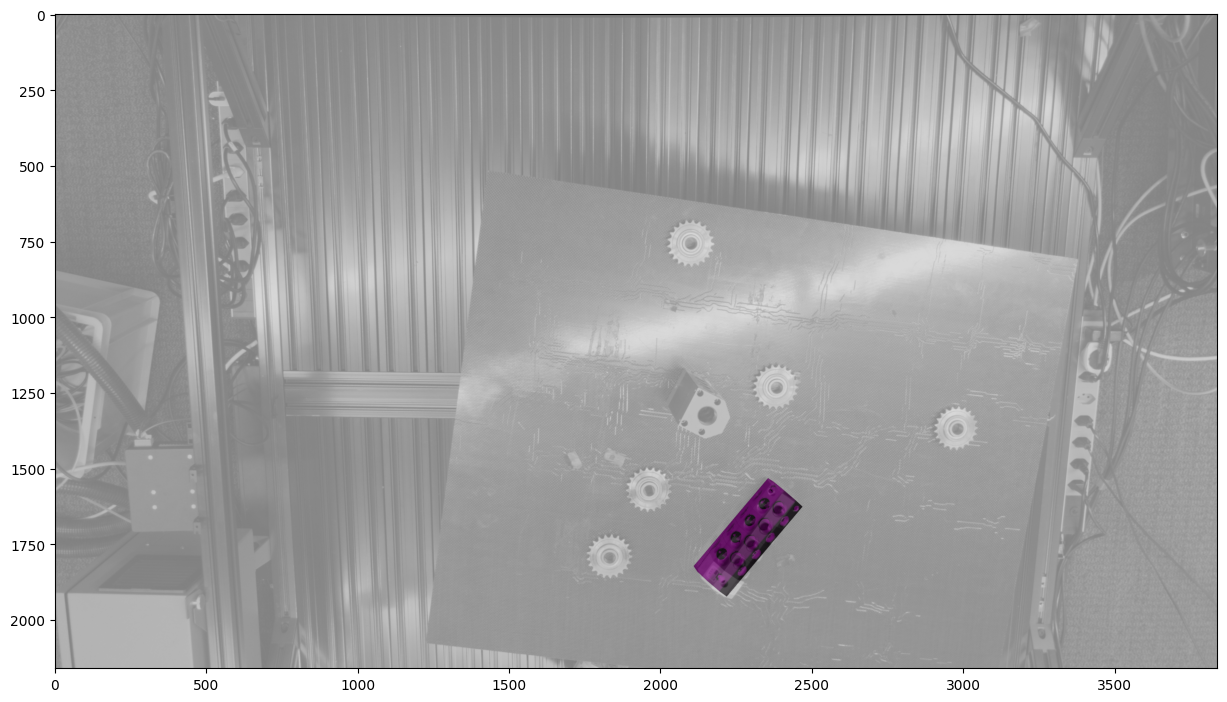

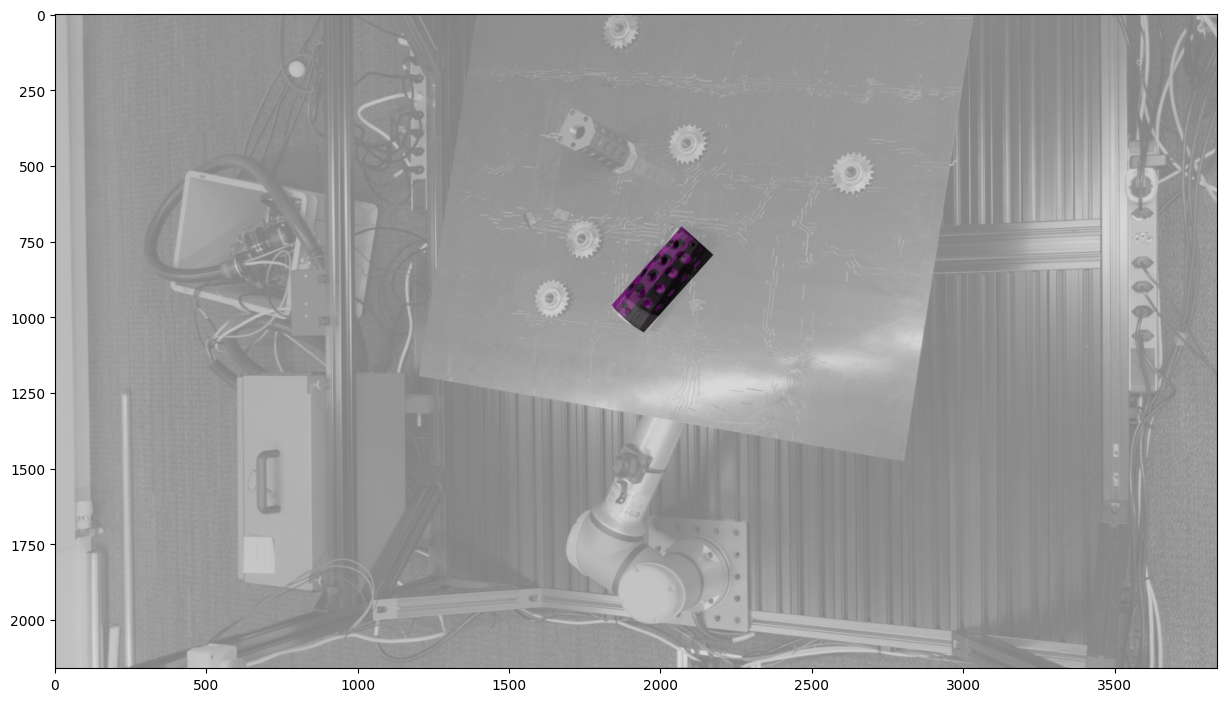

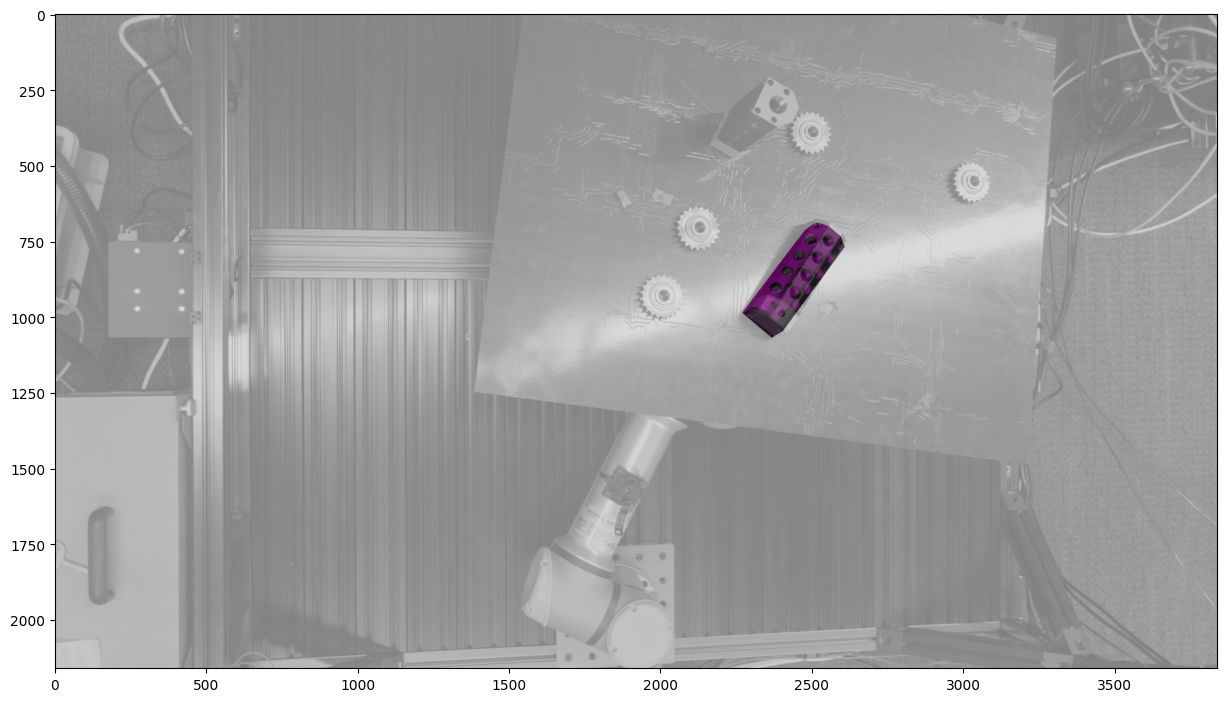

In [2]:
# scene_dir = "./datasets/ipd_bop_data_jan25_1/train_pbr/000000/"
# models_dir = './datasets/ipd_bop_data_jan25_1/models_eval/'
scene_dir = "./datasets/val/000003/"
models_dir = './datasets/models_eval/'
cam_ids = ["cam1", "cam2", "cam3"]
image_id = 3
obj_id = 11
obj_id_path = str(1000000+obj_id)[1:]
ply_file = os.path.join(models_dir, f"obj_{obj_id_path}.ply")
obj = trimesh.load(ply_file)
yolo_model_path = f'bpc/yolo/models/detection/obj_{obj_id}/yolo11-detection-obj_{obj_id}.pt'
pose_model_path = f'bpc/pose/pose_checkpoints/obj_{obj_id}/best_model.pth'

pose_params = PoseEstimatorParams(
    yolo_model_path=yolo_model_path,
    pose_model_path=pose_model_path, 
    yolo_conf_thresh=0.01,
    rotation_mode="quat"  # Using quaternion mode as in the checkpoint.
)
pose_estimator = PoseEstimator(pose_params)
t = time.time()
capture = Capture.from_dir(scene_dir, cam_ids, image_id, obj_id)
detections = pose_estimator._detect(capture)
pose_predictions = pose_estimator._match(capture, detections)
pose_estimator._estimate_rotation(pose_predictions)
print(time.time() - t)

for idx in range(len(capture.Ks)):
    plt.figure(figsize=(15, 15))
    plt.imshow(capture.images[idx])
    a, b = render_mask(obj, capture.Ks[idx], (capture.RTs[idx]), capture.images[0].shape[:2][::-1], [x.pose for x in pose_predictions])
    plt.imshow(a, alpha=0.5)
    plt.show()


Loading camera parameters from: ./datasets/val/000001/scene_camera_cam3.json
[array([[    0.90145,     -0.3749,    -0.21642,       -80.4],
       [    0.32129,      0.9145,    -0.24589,      6.3719],
       [     0.2901,     0.15212,     0.94483,      1710.6],
       [          0,           0,           0,           1]]), array([[   0.012638,    -0.97674,     0.21407,     -95.885],
       [    0.95467,   -0.051885,     -0.2931,       200.7],
       [    0.29739,     0.20807,     0.93181,      1722.1],
       [          0,           0,           0,           1]]), array([[    0.97129,     0.19596,     -0.1349,      66.257],
       [   -0.18554,     0.97886,    0.086008,      290.39],
       [    0.14891,   -0.058508,     0.98712,      1690.5],
       [          0,           0,           0,           1]])]
Processing image shape: (2160, 3840, 3)

0: 736x1280 5 object_14s, 8.2ms
Speed: 4.2ms preprocess, 8.2ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)
Processing ima

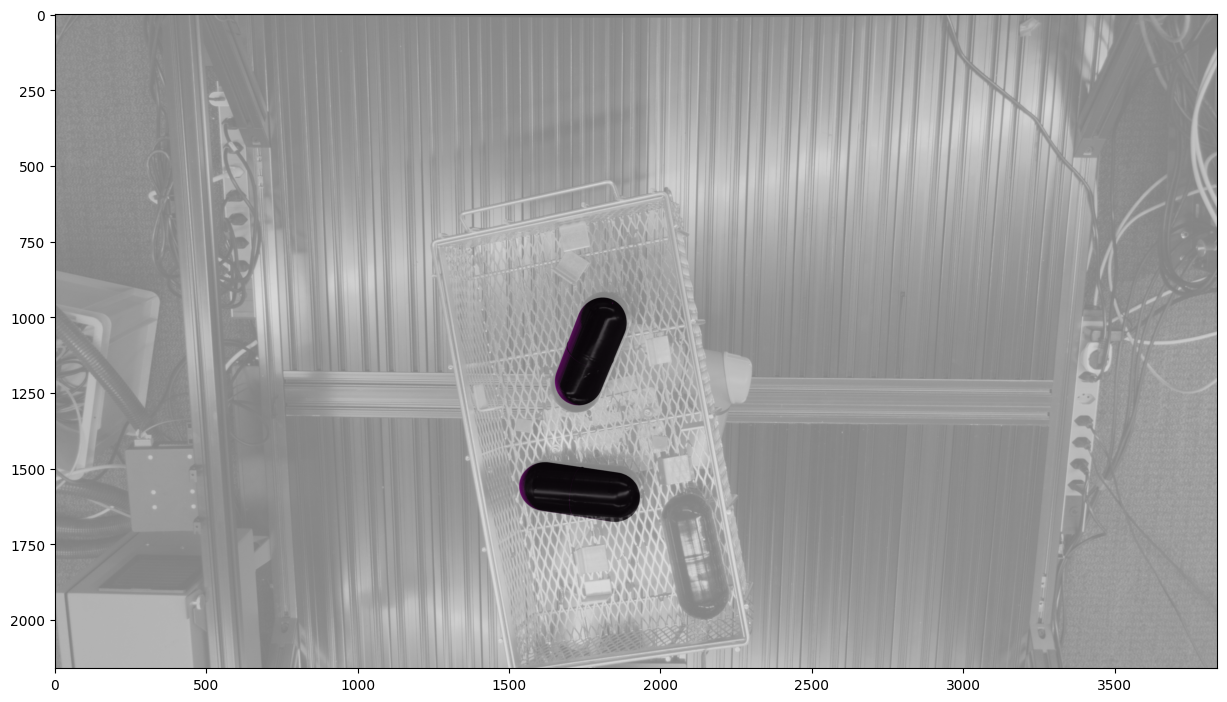

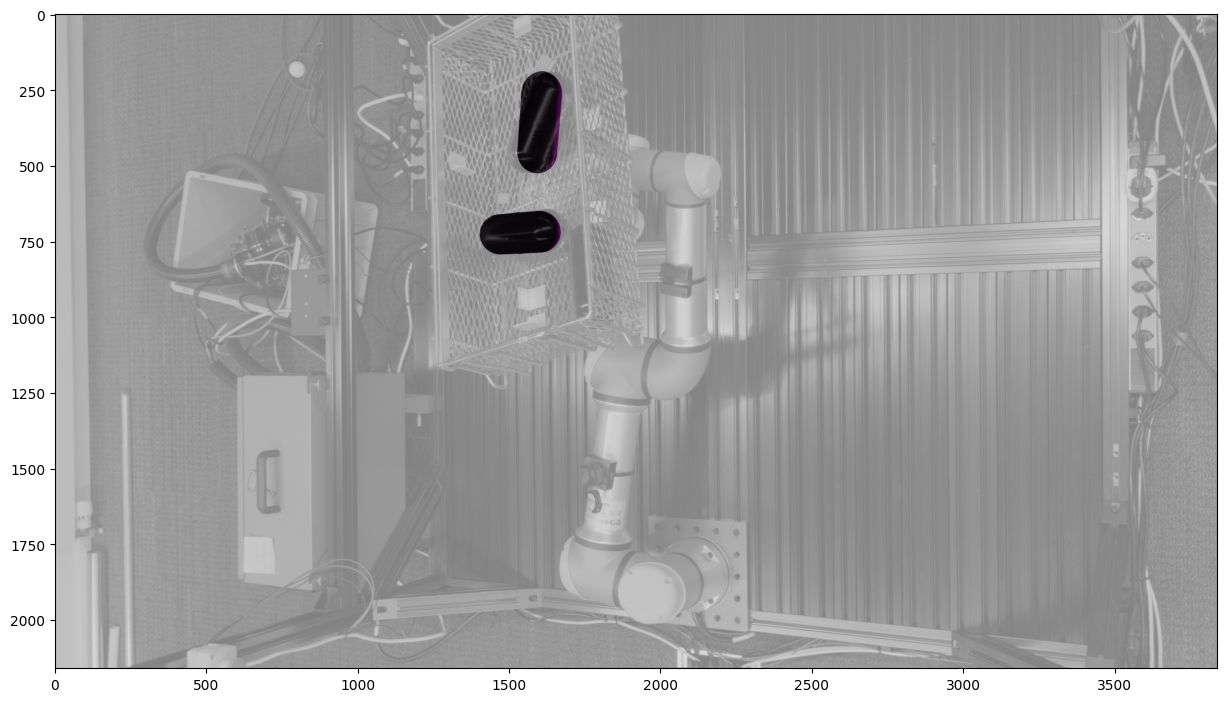

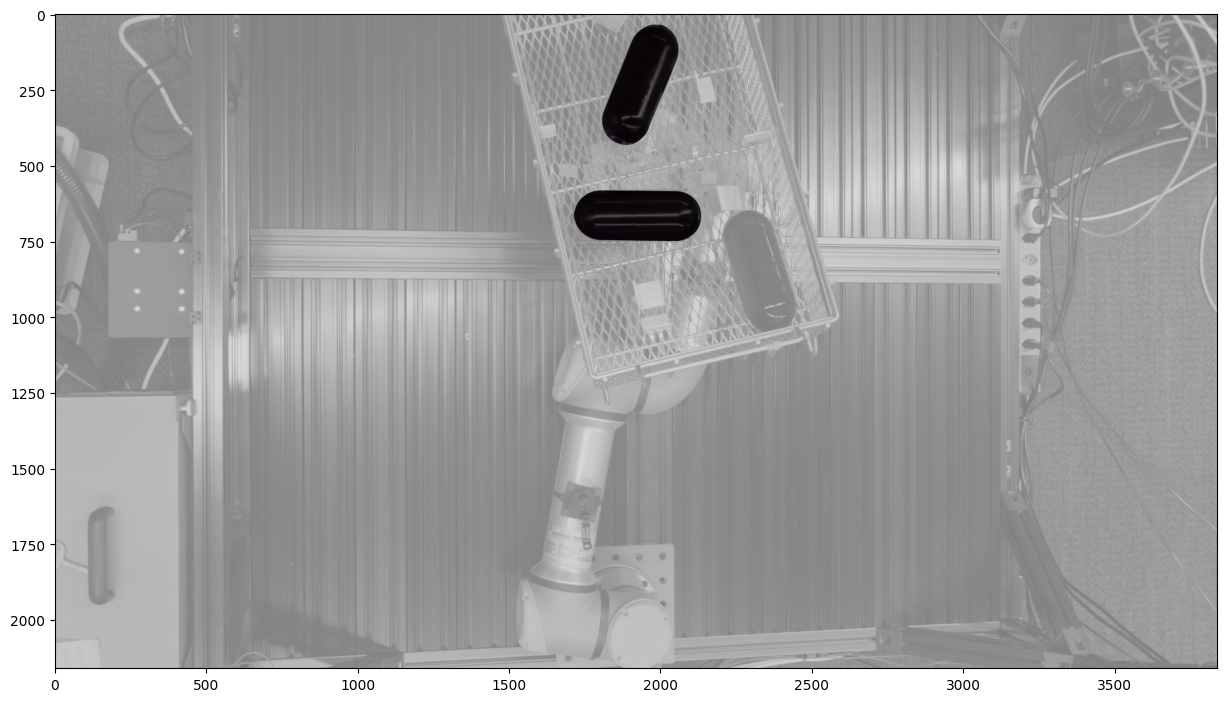

In [3]:
# scene_dir = "./datasets/ipd_bop_data_jan25_1/train_pbr/000000/"
# models_dir = './datasets/ipd_bop_data_jan25_1/models_eval/'
scene_dir = "./datasets/val/000001/"
models_dir = './datasets/models/'
cam_ids = ["cam1", "cam2", "cam3"]
image_id = 3
obj_id = 14
obj_id_path = str(1000000+obj_id)[1:]
ply_file = os.path.join(models_dir, f"obj_{obj_id_path}.ply")
obj = trimesh.load(ply_file)
yolo_model_path = f'bpc/yolo/models/detection/obj_{obj_id}/yolo11-detection-obj_{obj_id}.pt'
pose_model_path = f'bpc/pose/pose_checkpoints/obj_{obj_id}/best_model.pth'

pose_params = PoseEstimatorParams(
    yolo_model_path=yolo_model_path,
    pose_model_path=pose_model_path, 
    yolo_conf_thresh=0.01,
    rotation_mode="quat"  # Using quaternion mode as in the checkpoint.
)
pose_estimator = PoseEstimator(pose_params)
t = time.time()
capture = Capture.from_dir(scene_dir, cam_ids, image_id, obj_id)
detections = pose_estimator._detect(capture)
pose_predictions = pose_estimator._match(capture, detections)
pose_estimator._estimate_rotation(pose_predictions)
print(time.time() - t)

for idx in range(len(capture.Ks)):
    plt.figure(figsize=(15, 15))
    plt.imshow(capture.images[idx])
    a, b = render_mask(obj, capture.Ks[idx], (capture.RTs[idx]), capture.images[0].shape[:2][::-1], [x.pose for x in pose_predictions])
    plt.imshow(a, alpha=0.5)
    plt.show()


Loading camera parameters from: ./datasets/val/000004/scene_camera_cam3.json
[array([[   -0.99475,    0.074619,   -0.070047,     -86.088],
       [  -0.083956,    -0.20353,     0.97546,      32.113],
       [   0.058531,     0.97622,     0.20873,      1891.7],
       [          0,           0,           0,           1]]), array([[   0.064573,   -0.069609,    -0.99548,      42.952],
       [     0.9795,     0.19519,    0.049888,      257.76],
       [    0.19083,    -0.97829,    0.080785,      1927.6],
       [          0,           0,           0,           1]]), array([[    0.22556,   -0.080383,    -0.97091,      227.58],
       [     0.9528,     0.22606,     0.20264,     -67.216],
       [     0.2032,    -0.97079,     0.12758,        1846],
       [          0,           0,           0,           1]]), array([[    -0.9903,    0.083916,    -0.11072,     -59.266],
       [   -0.12508,    -0.19162,     0.97347,     -125.79],
       [   0.060472,     0.97787,     0.20026,        1859],
 

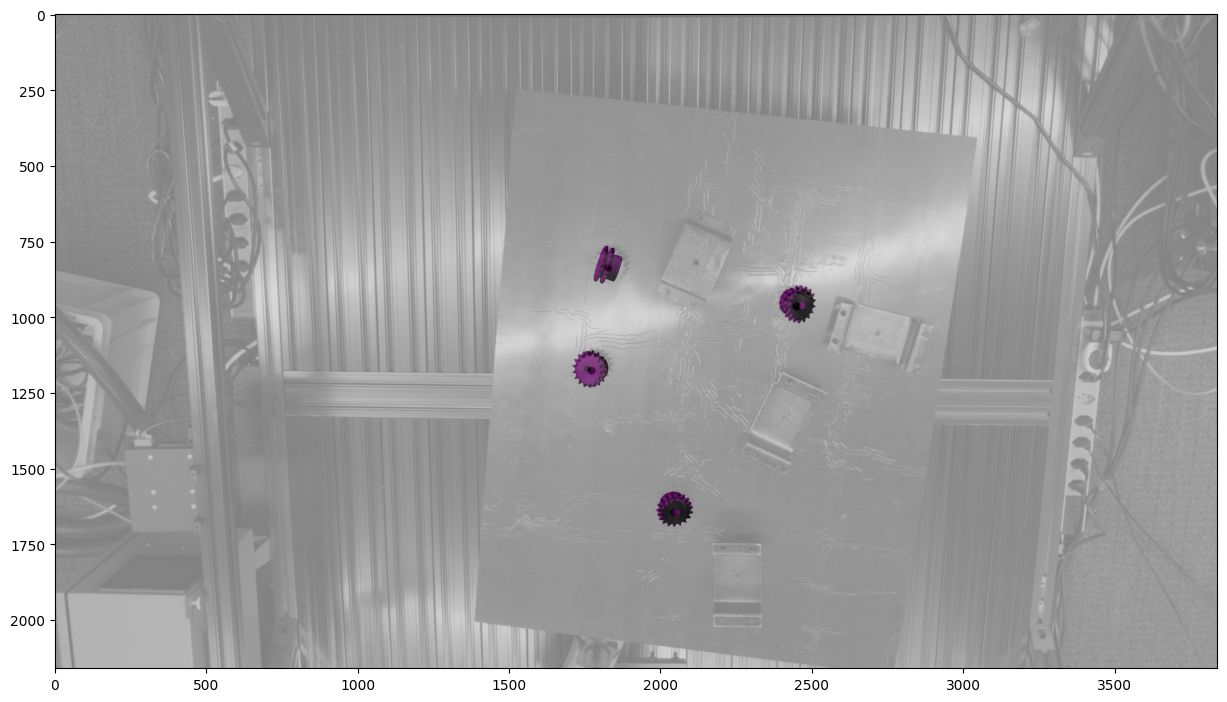

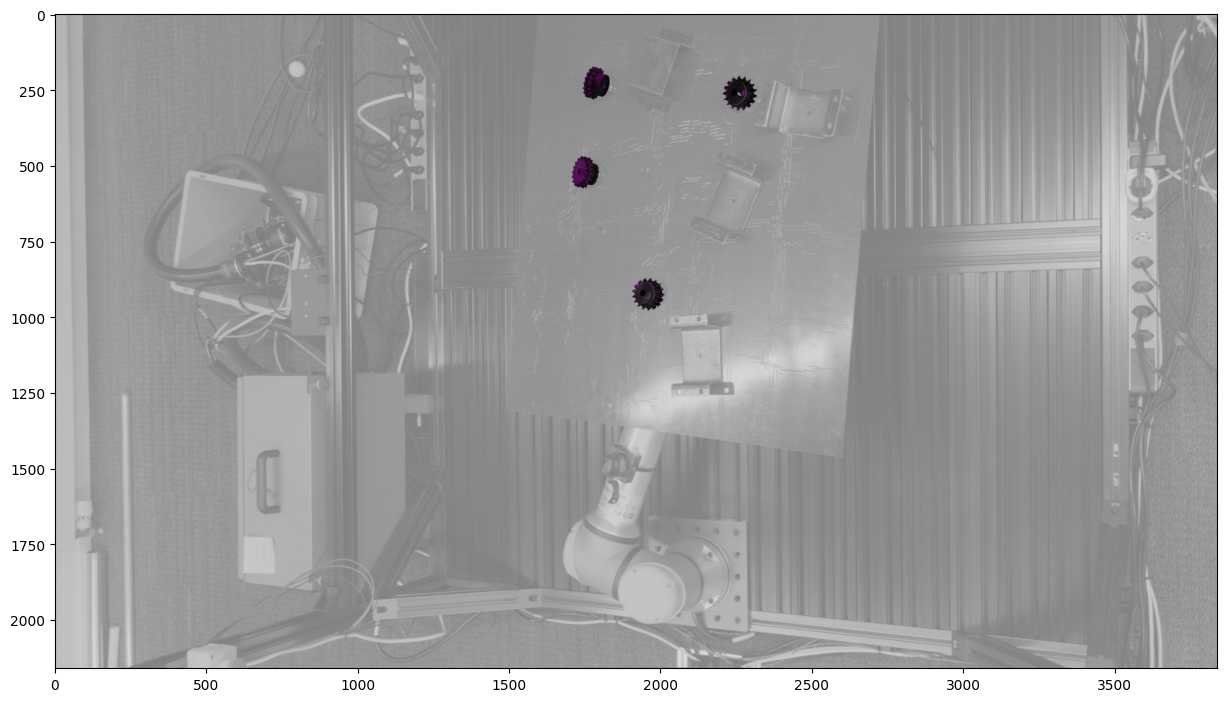

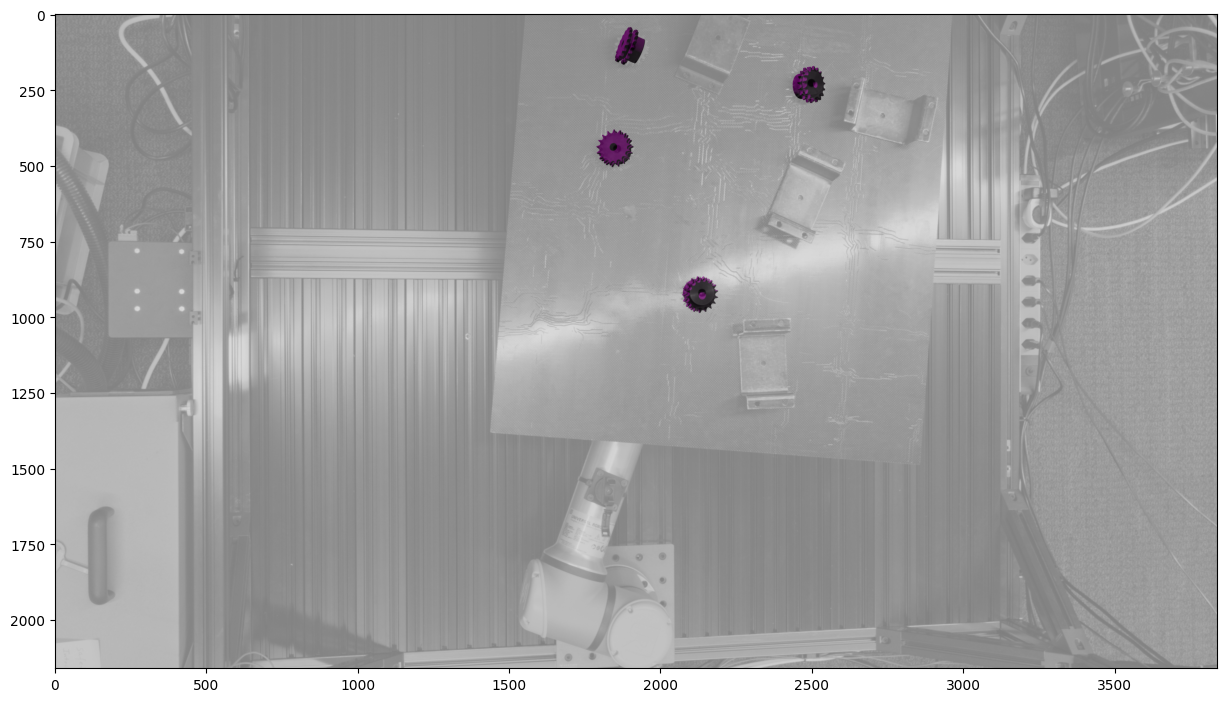

In [4]:
# scene_dir = "./datasets/ipd_bop_data_jan25_1/train_pbr/000000/"
# models_dir = './datasets/ipd_bop_data_jan25_1/models_eval/'
scene_dir = "./datasets/val/000004/"
models_dir = './datasets/models_eval/'
cam_ids = ["cam1", "cam2", "cam3"]
image_id = 1
obj_id = 8
obj_id_path = str(1000000+obj_id)[1:]
ply_file = os.path.join(models_dir, f"obj_{obj_id_path}.ply")
obj = trimesh.load(ply_file)
yolo_model_path = f'bpc/yolo/models/detection/obj_{obj_id}/yolo11-detection-obj_{obj_id}.pt'
pose_model_path = f'bpc/pose/pose_checkpoints/obj_{obj_id}/final_model.pth'

pose_params = PoseEstimatorParams(
    yolo_model_path=yolo_model_path,
    pose_model_path=pose_model_path, 
    yolo_conf_thresh=0.01,
    rotation_mode="quat"  # Using quaternion mode as in the checkpoint.
)
pose_estimator = PoseEstimator(pose_params)
t = time.time()
capture = Capture.from_dir(scene_dir, cam_ids, image_id, obj_id)
detections = pose_estimator._detect(capture)
pose_predictions = pose_estimator._match(capture, detections)
pose_estimator._estimate_rotation(pose_predictions)
print(time.time() - t)

for idx in range(len(capture.Ks)):
    plt.figure(figsize=(15, 15))
    plt.imshow(capture.images[idx])
    a, b = render_mask(obj, capture.Ks[idx], (capture.RTs[idx]), capture.images[0].shape[:2][::-1], [x.pose for x in pose_predictions])
    plt.imshow(a, alpha=0.5)
    plt.show()
